In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Python/Dataset/bodyfat.csv')
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
new_df=df.rename(columns={'Height':'Weight', 'Weight':'Height'})
new_df

,Density,BodyFat,Age,Height,Weight,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [ ]:
df.isna().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [ ]:
new_df=new_df.drop(['Age','Wrist','Chest','Knee','Ankle'],axis='columns')
new_df

,Density,BodyFat,Height,Weight,Neck,Abdomen,Hip,Thigh,Biceps,Forearm
0,1.0708,12.3,154.25,67.75,36.2,85.2,94.5,59.0,32.0,27.4
1,1.0853,6.1,173.25,72.25,38.5,83.0,98.7,58.7,30.5,28.9
2,1.0414,25.3,154.00,66.25,34.0,87.9,99.2,59.6,28.8,25.2
3,1.0751,10.4,184.75,72.25,37.4,86.4,101.2,60.1,32.4,29.4
4,1.0340,28.7,184.25,71.25,34.4,100.0,101.9,63.2,32.2,27.7
...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,134.25,67.00,34.9,83.6,88.8,49.6,25.6,25.7
248,1.0236,33.6,201.00,69.75,40.9,105.0,104.5,59.6,35.2,28.6
249,1.0328,29.3,186.75,66.00,38.9,111.5,101.7,60.3,31.3,27.2
250,1.0399,26.0,190.75,70.50,38.9,101.3,97.8,56.0,30.5,29.4


Text(0.5, 1.0, 'Body Density')

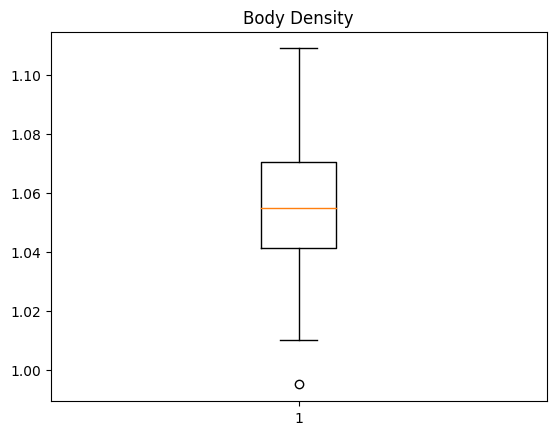

In [ ]:
plt.boxplot(new_df['Density'])
plt.title('Body Density')

In [ ]:
q1 = np.percentile(new_df['Density'],25, interpolation='midpoint')
q2 = np.percentile(new_df['Density'],50, interpolation='midpoint')
q3 = np.percentile(new_df['Density'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

1.0414
1.0549
1.0704


<ipython-input-144-702f0b265dac>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['Density'],25, interpolation='midpoint')
<ipython-input-144-702f0b265dac>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['Density'],50, interpolation='midpoint')
<ipython-input-144-702f0b265dac>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = 

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

0.9979000000000002
1.1139


In [ ]:
outlier= []
for x in new_df['Density']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[0.995]

In [ ]:
ind1= new_df['Density']<low_limit
x=new_df.loc[ind1].index
x

Int64Index([215], dtype='int64')

In [ ]:
new_df.drop([215],inplace= True)

Text(0.5, 1.0, 'Body Density')

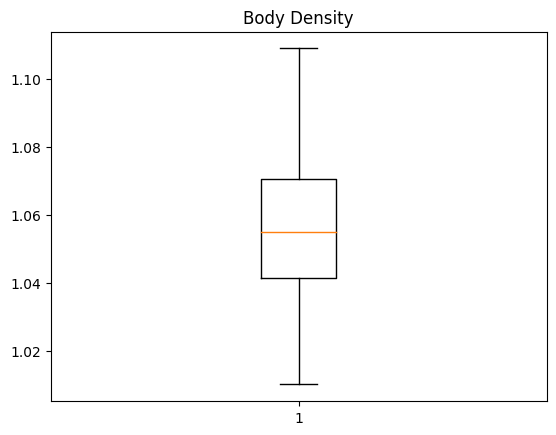

In [ ]:
plt.boxplot(new_df['Density'])
plt.title('Body Density')

Text(0.5, 1.0, 'BodyFat')

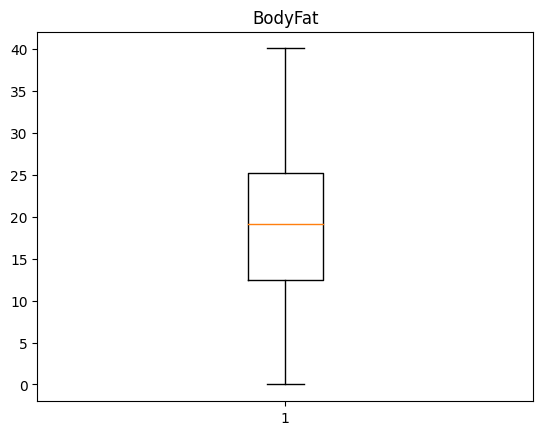

In [ ]:
plt.boxplot(new_df['BodyFat'])
plt.title('BodyFat')

In [ ]:
q1 = np.percentile(new_df['BodyFat'],25, interpolation='midpoint')
q2 = np.percentile(new_df['BodyFat'],50, interpolation='midpoint')
q3 = np.percentile(new_df['BodyFat'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

12.45
19.2
25.25


<ipython-input-154-743895e3219b>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['BodyFat'],25, interpolation='midpoint')
<ipython-input-154-743895e3219b>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['BodyFat'],50, interpolation='midpoint')
<ipython-input-154-743895e3219b>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = 

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

-6.7500000000000036
44.45


In [ ]:
outlier= []
for x in new_df['BodyFat']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[]

Text(0.5, 1.0, 'Height')

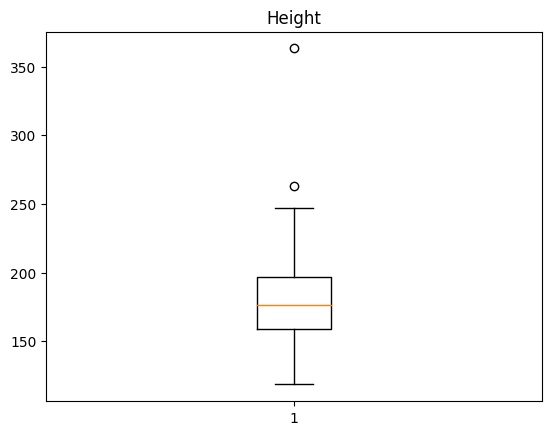

In [ ]:
plt.boxplot(new_df['Height'])
plt.title('Height')

In [ ]:
q1 = np.percentile(new_df['Height'],25, interpolation='midpoint')
q2 = np.percentile(new_df['Height'],50, interpolation='midpoint')
q3 = np.percentile(new_df['Height'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

158.75
176.25
196.875


<ipython-input-158-46617b1cfeef>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['Height'],25, interpolation='midpoint')
<ipython-input-158-46617b1cfeef>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['Height'],50, interpolation='midpoint')
<ipython-input-158-46617b1cfeef>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

101.5625
254.0625


In [ ]:
outlier= []
for x in new_df['Height']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[363.15, 262.75]

In [ ]:
ind1= new_df['Height']>up_limit
x=new_df.loc[ind1].index
x

Int64Index([38, 40], dtype='int64')

In [ ]:
new_df.drop([38,40],inplace= True)

Text(0.5, 1.0, 'Height')

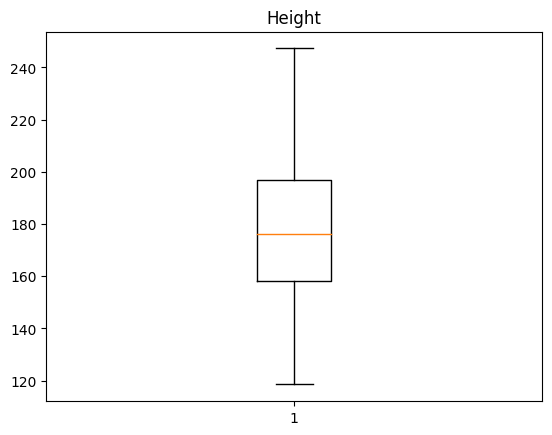

In [ ]:
plt.boxplot(new_df['Height'])
plt.title('Height')

Text(0.5, 1.0, 'Weight')

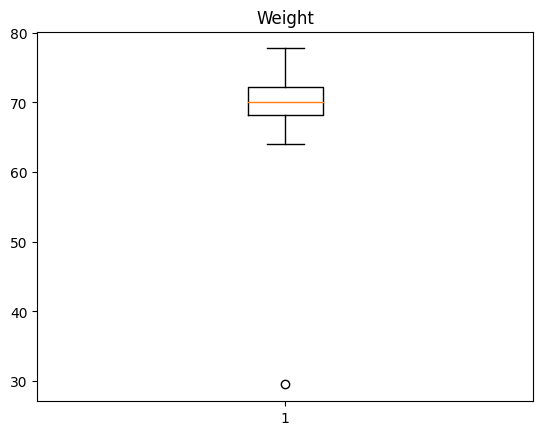

In [ ]:
plt.boxplot(new_df['Weight'])
plt.title('Weight')

In [ ]:
q1 = np.percentile(new_df['Weight'],25, interpolation='midpoint')
q2 = np.percentile(new_df['Weight'],50, interpolation='midpoint')
q3 = np.percentile(new_df['Weight'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

68.25
70.0
72.25


<ipython-input-165-7ff7ef6f8ecd>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['Weight'],25, interpolation='midpoint')
<ipython-input-165-7ff7ef6f8ecd>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['Weight'],50, interpolation='midpoint')
<ipython-input-165-7ff7ef6f8ecd>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

62.25
78.25


In [ ]:
outlier= []
for x in new_df['Weight']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[29.5]

In [ ]:
ind1= new_df['Weight']<low_limit
x=new_df.loc[ind1].index
x

Int64Index([41], dtype='int64')

In [ ]:
new_df.drop([41],inplace= True)

Text(0.5, 1.0, 'Weight')

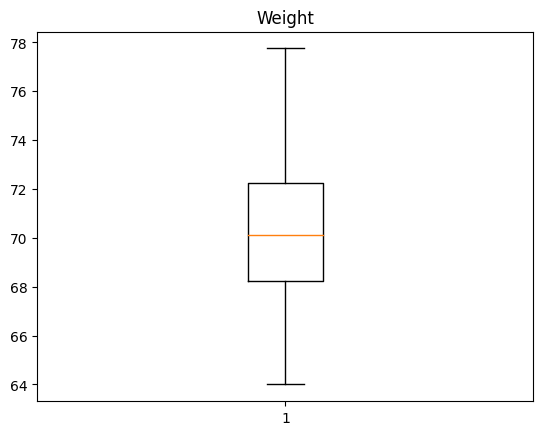

In [ ]:
plt.boxplot(new_df['Weight'])
plt.title('Weight')

Text(0.5, 1.0, 'Neck')

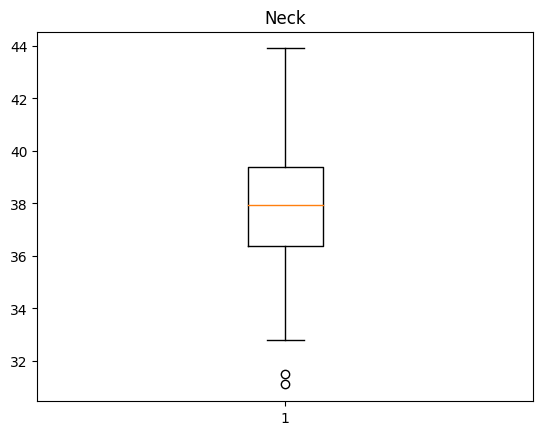

In [ ]:
plt.boxplot(new_df['Neck'])
plt.title('Neck')

In [ ]:
q1 = np.percentile(new_df['Neck'],25, interpolation='midpoint')
q2 = np.percentile(new_df['Neck'],50, interpolation='midpoint')
q3 = np.percentile(new_df['Neck'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

36.349999999999994
37.95
39.4


<ipython-input-173-5f79329c4672>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['Neck'],25, interpolation='midpoint')
<ipython-input-173-5f79329c4672>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['Neck'],50, interpolation='midpoint')
<ipython-input-173-5f79329c4672>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = np.per

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

31.774999999999988
43.97500000000001


In [ ]:
outlier= []
for x in new_df['Neck']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[31.5, 31.1]

In [ ]:
ind1= new_df['Neck']<low_limit
x=new_df.loc[ind1].index
x

Int64Index([44, 105], dtype='int64')

In [ ]:
new_df.drop([44,105],inplace= True)

Text(0.5, 1.0, 'Neck')

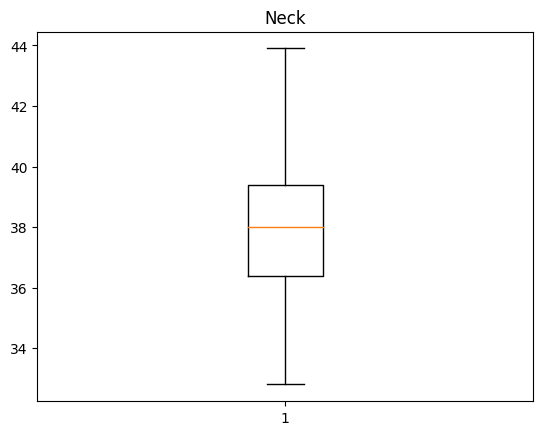

In [ ]:
plt.boxplot(new_df['Neck'])
plt.title('Neck')

Text(0.5, 1.0, 'Abdomen')

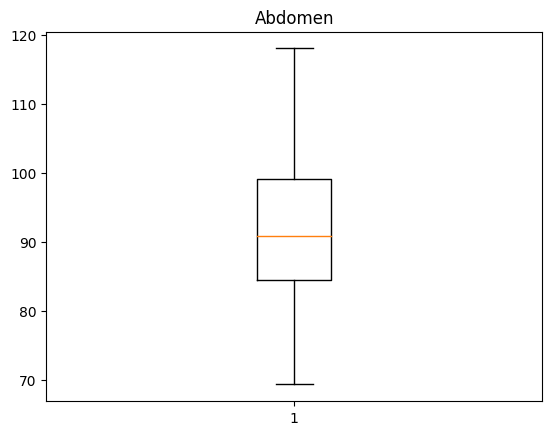

In [ ]:
plt.boxplot(new_df['Abdomen'])
plt.title('Abdomen')

In [ ]:
q1 = np.percentile(new_df['Abdomen'],25, interpolation='midpoint')
q2 = np.percentile(new_df['Abdomen'],50, interpolation='midpoint')
q3 = np.percentile(new_df['Abdomen'],75, interpolation='midpoint')

print(q1)
print(q2)
print(q3)

84.55
90.9
99.0


<ipython-input-181-746b6d3c1bf5>:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q1 = np.percentile(new_df['Abdomen'],25, interpolation='midpoint')
<ipython-input-181-746b6d3c1bf5>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q2 = np.percentile(new_df['Abdomen'],50, interpolation='midpoint')
<ipython-input-181-746b6d3c1bf5>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  q3 = 

In [ ]:
iqr= q3-q1
low_limit = q1-1.5*iqr
up_limit = q3+1.5*iqr

print(low_limit)
print(up_limit)

62.87499999999999
120.67500000000001


In [ ]:
outlier= []
for x in new_df['Abdomen']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)

outlier

[]

In [ ]:
x=new_df.drop('BodyFat', axis='columns')
y=new_df['BodyFat']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [ ]:
model=SVR()    #model=SVC() for classifier
model.fit(x_train,y_train)

SVR()

In [ ]:
x_train

,Density,Height,Weight,Neck,Abdomen,Hip,Thigh,Biceps,Forearm
241,1.0207,224.50,68.25,38.8,118.0,114.3,61.3,34.9,30.1
170,1.0926,152.25,67.75,37.0,81.9,92.8,54.7,30.4,27.4
66,1.0499,151.50,70.75,35.6,83.9,93.9,55.0,29.6,27.4
78,1.0498,161.25,70.25,37.8,95.4,99.3,53.5,31.4,26.8
0,1.0708,154.25,67.75,36.2,85.2,94.5,59.0,32.0,27.4
...,...,...,...,...,...,...,...,...,...
147,1.0322,206.50,69.75,40.9,100.5,106.2,68.4,33.3,29.7
118,1.0404,191.00,74.00,38.3,92.4,104.3,64.6,33.6,29.5
128,1.0515,192.25,73.25,39.8,93.5,99.5,61.7,33.3,29.6
187,1.0524,210.50,72.00,38.5,98.9,104.1,63.5,36.4,30.4


In [ ]:
x_test

,Density,Height,Weight,Neck,Abdomen,Hip,Thigh,Biceps,Forearm
180,1.0387,219.25,74.25,40.0,104.6,109.8,68.1,35.6,29.0
175,1.0763,145.25,69.25,36.0,79.4,89.2,50.3,31.0,26.9
79,1.0560,171.25,69.25,37.4,98.6,100.2,56.5,30.3,28.7
136,1.0491,166.75,70.75,37.0,86.1,95.6,58.8,32.7,28.3
28,1.0910,133.25,64.75,36.4,73.9,88.5,50.1,30.5,27.9
174,1.0414,226.75,71.75,41.5,108.8,114.4,69.2,35.4,21.0
190,1.0728,153.00,69.25,36.4,80.6,92.3,54.3,29.6,27.3
129,1.0648,165.25,69.75,38.3,87.0,97.8,57.4,31.6,27.8
204,1.0209,223.00,69.75,40.9,113.9,107.1,63.5,34.8,30.7
135,1.0374,186.00,69.75,37.8,101.1,102.1,58.9,30.9,28.8


In [ ]:
y_predicted=model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.4004121343003173

In [ ]:
y_predicted

array([24.31817809, 14.43113423, 18.78469055, 17.2838472 , 13.1271697 ,
       25.25056406, 15.34594915, 17.23880076, 25.1230762 , 20.61582623,
       20.73824077, 18.86593506, 22.0979714 , 15.75491257, 13.54096856,
       17.6525482 , 17.97774168, 18.30217339, 18.02447397, 22.94432779,
       24.68211688, 23.27324946, 15.12078807, 13.01520026, 19.40630358,
       17.68401971, 19.6888691 , 17.89985966, 20.74521979, 20.9353611 ,
       15.80390751, 16.67999384, 16.36915429, 21.32567364, 18.46675464,
       25.86591274, 19.67836064, 16.82456491, 21.26686115, 15.59373855,
       16.55827174, 18.75883874, 26.25299157, 15.96353087, 21.42738346,
       23.16151742, 25.62761802, 16.25495834, 19.66869308, 19.0141686 ,
       23.96562481])

In [ ]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
a=float(input('Body Density: '))
b=float(input('Height: '))
c=float(input('Weight: '))
d=float(input('Neck: '))
e=float(input('Abdomen: '))
f=float(input('Hip: '))
g=float(input('Thigh: '))
h=float(input('Biceps: '))
i=float(input('Forearm: '))
df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g],[h],[i]], dtype=int)
y_predicted=model.predict([[a,b,c,d,e,f,g,h,i]])
print('The Body fat is ',y_predicted)

Body Density: 1.5
Height: 165
Weight: 56
Neck: 35
Abdomen: 100
Hip: 95
Thigh: 60
Biceps: 35
Forearm: 30
The Body fat is  [18.28619758]


<ipython-input-125-31e7a71f8a59>:10: FutureWarning: In a future version, passing float-dtype values and an integer dtype to DataFrame will retain floating dtype if they cannot be cast losslessly (matching Series behavior). To retain the old behavior, use DataFrame(data).astype(dtype)
  df=pd.DataFrame([[a],[b],[c],[d],[e],[f],[g],[h],[i]], dtype=int)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
